# Week 2: Notebook 1 - Introduction to Statistical Learning

We start with the required imports.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np
from sklearn import datasets, linear_model
plt.style.use('ggplot')
np.random.seed(seed=0)
from tabulate import tabulate

# If you do not have some of the above libraries installed, you can run 'pip install X' , for example 'pip install tabluate'

Create a function that generates data from our 'true' model $y=\beta_0+\beta_1x  +\beta_2x^2 + \beta_3x^3 +\epsilon \text{   } $. We assume the error term is a normal (Gaussian) distribution with variance $\sigma^2$. We give you the function signature:

>def generate_true_model(X, beta0, beta1,  beta2, beta3, sigma):

where X is a vector (1d numpy array) with values of the feature or variable x, beta0, beta1, beta2 and beta3 are the model parameters, and sigma is the standard deviation of the error term. 

NOTE: In reality, we will never know this 'true model' $f(x)$

HINT: To sample values from a normal distribution, you can use the np.random.normal() function

(1000,) (1000,)


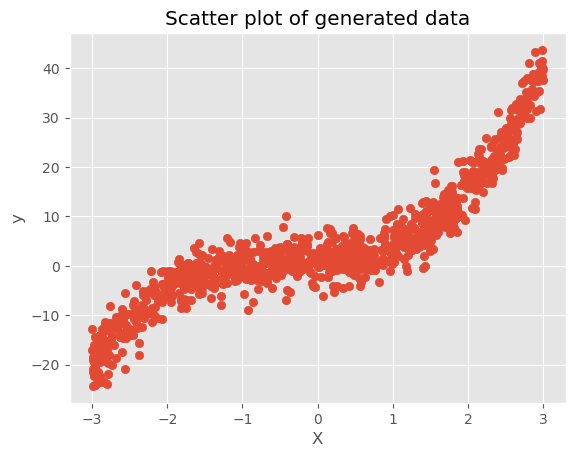

In [23]:
# gaussian model to generate data from linear regression
def generate_true_model(X, beta0, beta1, beta2, beta3, sigma):
    n = len(X)
    epsilon = np.random.normal(0, sigma, n)
    y = beta0 + beta1 * X + beta2 * X**2 + beta3 * X**3 + epsilon
    return y

data = np.random.uniform(-3, 3, 1000)

y = generate_true_model(data, beta0=1, beta1=1, beta2=1, beta3=1, sigma=3)

print(data.shape, y.shape)

# Plot the data
plt.scatter(data, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of generated data')
plt.show()

This function will allow you to create data to play with, below. 

Let's just test it, with a model that is $y=20-1.5x+0.5x^2-0.02x^3+N(0,\sigma^2)\text{   }$ (i.e. standard deviation is $\sigma$, variance is $\sigma^2$)

First, with NO error ($\sigma=0$)!

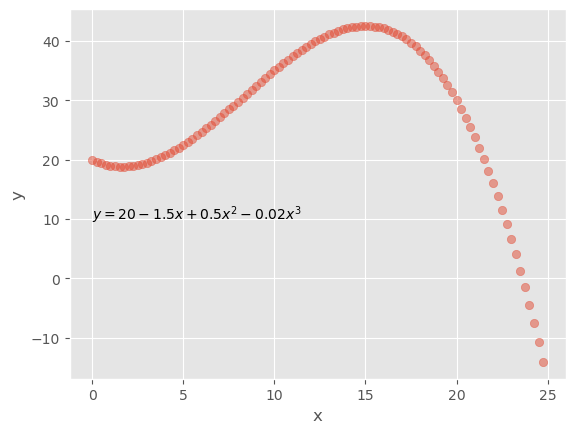

In [4]:
Xe=np.arange(0,25,0.25)    
ye=generate_true_model(Xe, 20,-1.5,0.5,-0.02, 0) 
plt.scatter(Xe, ye,alpha=0.5)
plt.annotate('$y=20-1.5x+0.5x^2-0.02x^3$', xy=(0, 10), xytext=(0, 10), fontsize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now, we add a little bit of noise or error ($\sigma=6$). This error could be due to several factors, for example the response variable y depends on features other than x, or there is an error associated with the measurement of y ,etc.

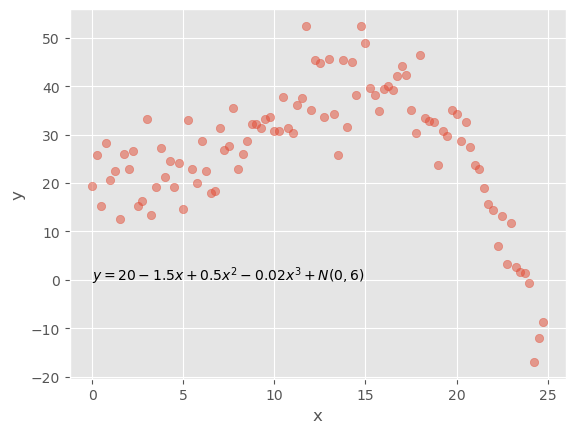

In [5]:
Xe=np.arange(0,25,0.25)    
ye=generate_true_model(Xe, 20,-1.5,0.5,-0.02, 6) 
plt.scatter(Xe, ye,alpha=0.5)
plt.annotate('$y=20-1.5x+0.5x^2-0.02x^3 + N(0,6)$', xy=(0, 0), xytext=(0, 0), fontsize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Train a simple linear model

#### First we will train a simple linear regression model (we will get into more details of this model in the next part of the lecture); in this session and in for the rest of the course, we will often use the sklearn library (https://scikit-learn.org/stable/). We will call this model 'M1'.

#### The linear model takes the following form: $y =  \beta_0+\beta_1x  + \epsilon$

In [6]:
# import the linear regression model from sklearn
from sklearn import linear_model

In [7]:
#First, we define the model object
M1 = linear_model.LinearRegression()
Xe = Xe.reshape(-1,1)  # Convert from a 1D to a 2D numpy array for SK learn

# Fit the model using the data in Xe and ye
M1.fit(Xe,ye)
# Display model coefficients
print(M1.coef_,M1.intercept_)

[-0.27769387] 30.44061260756985


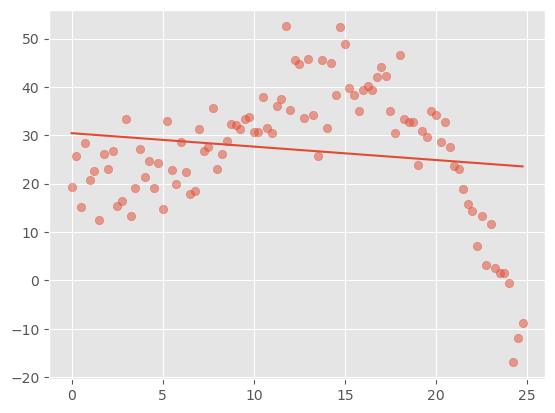

In [8]:
Y_M1_predict_train = M1.predict(Xe) # model predictions on training set
plt.plot(Xe, Y_M1_predict_train)
plt.scatter(Xe, ye,alpha=0.5)
plt.show()

In [9]:
# Compute the MSE on the train set
MSE_train_M1 = np.dot((ye-Y_M1_predict_train),(ye-Y_M1_predict_train))/(len(ye))
print('MSE M1 Train',MSE_train_M1)

MSE M1 Train 170.7446027408252


In [10]:
# Generate a test set and compute MSE on test set

# First we generate a large random set of test points
Xe_test = np.random.uniform(0,25,5000)

# Compute the response variable for these tests points using our function
ye_test = generate_true_model(Xe_test, 20,-1.5,0.5,-0.02, 6) 
Xe_test = Xe_test.reshape(-1,1)

# Generate the model predictions for test set
Y_M1_predict_test = M1.predict(Xe_test) 

# Compute the MSE on the test set
MSE_test_M1 = np.dot((ye_test-Y_M1_predict_test),(ye_test-Y_M1_predict_test))/len(ye_test)
print('MSE M1 Test',MSE_test_M1)

MSE M1 Test 206.52255451734857


## Train a fourth order polynomial model

#### Next we will train a fourth-degree polynomial regression model, which takes the form: 
#### $y =  \beta_0+ \sum_{j=1}^{j=4} \beta_j x^j  + \epsilon$
#### We will call this model 'M2'. Observe that this is a more complex (more flexibility) model than the linear model and has 5 parameters. 

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# To fit this polynomial regression we will first use a feature of sklearn to create polynomial features 
# from a given variable X. In this case X^2, X^3, X^4.

poly = PolynomialFeatures(degree=4, include_bias=False) 
poly_features = poly.fit_transform(Xe.reshape(-1, 1))

In [12]:
np.shape(poly_features)

(100, 4)

In [13]:
# We then fit a standard linear model with the polynomial features

M2 = linear_model.LinearRegression()
M2.fit(poly_features, ye)
print(M2.coef_,M2.intercept_)

[-2.24979998e+00  5.25580173e-01 -1.93974545e-02 -2.50655632e-05] 23.159594173842496


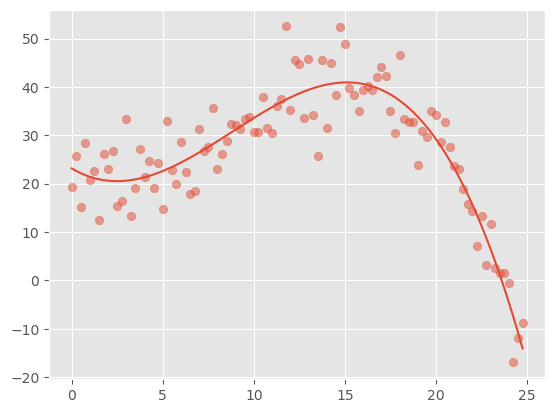

In [14]:
Y_M2_predict_train = M2.predict(poly_features) # model predictions on training set
plt.plot(Xe, Y_M2_predict_train)
plt.scatter(Xe, ye,alpha=0.5)
plt.show()

In [15]:
# Compute the MSE on the train set
MSE_train_M2 = np.dot((ye-Y_M2_predict_train),(ye-Y_M2_predict_train))/(len(ye))
print('MSE M2 Train',MSE_train_M2)
# Compute the MSE on the test set
poly_test = PolynomialFeatures(degree=4, include_bias=False)
poly_features_test = poly_test.fit_transform(Xe_test.reshape(-1, 1))
Y_M2_predict_test = M2.predict(poly_features_test)
MSE_test_M2 = np.dot((ye_test-Y_M2_predict_test),(ye_test-Y_M2_predict_test))/len(ye_test)
print('MSE M2 Test',MSE_test_M2)

MSE M2 Train 27.777238835908083
MSE M2 Test 37.08619049725128


## Train a 10th order polynomial model

#### Finally we will train a tenth-degree polynomial regression model, which takes the form: 
#### $y =  \beta_0+ \sum_{j=1}^{j=10} \beta_j x^j  + \epsilon$
#### We will call this model 'M3'. Observe that this is the most complex model and has 11 parameters. 

In [16]:
poly_10 = PolynomialFeatures(degree=10, include_bias=False)
poly_features_10 = poly_10.fit_transform(Xe.reshape(-1, 1))
M3 = linear_model.LinearRegression()
M3.fit(poly_features_10, ye)
print(M3.coef_,M3.intercept_)

[ 1.13484168e+00 -8.71576373e-01  2.82284882e-01 -4.86322906e-02
  5.79681108e-03 -4.31924548e-04  1.71638593e-05 -2.49349506e-07
 -3.27012110e-09  1.01414533e-10] 21.118566661307558


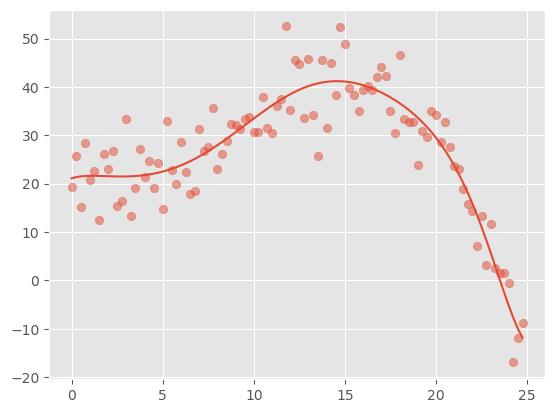

In [17]:
Y_M3_predict_train = M3.predict(poly_features_10) # model predictions on training set
plt.plot(Xe, Y_M3_predict_train)
plt.scatter(Xe, ye,alpha=0.5)
plt.show()

In [18]:
# Compute the MSE on the train set
MSE_train_M3 = np.dot((ye-Y_M3_predict_train),(ye-Y_M3_predict_train))/(len(ye))
print('MSE M3 Train',MSE_train_M3)
# Compute the MSE on the test set
poly_10_test = PolynomialFeatures(degree=10, include_bias=False)
poly_features_10_test = poly_10_test.fit_transform(Xe_test.reshape(-1, 1))
Y_M3_predict_test = M3.predict(poly_features_10_test)
MSE_test_M3 = np.dot((ye_test-Y_M3_predict_test),(ye_test-Y_M3_predict_test))/len(ye_test)
print('MSE M3 Test',MSE_test_M3)

MSE M3 Train 27.35376388518523
MSE M3 Test 37.798019799327726


## Create a table summarizing the training and test MSE for the three models

In [19]:
MSE_Models = [["M1 (Linear)", MSE_train_M1, MSE_test_M1], 
        ["M2 (poly - 4)", MSE_train_M2, MSE_test_M2], 
        ["M3 (poly - 10)", MSE_train_M3, MSE_test_M3]]
col_names = ["Model", "MSE Train", "MSE Test"]
print(tabulate(MSE_Models, headers=col_names, tablefmt="grid"))

+----------------+-------------+------------+
| Model          |   MSE Train |   MSE Test |
+================+=============+============+
| M1 (Linear)    |    170.745  |   206.523  |
+----------------+-------------+------------+
| M2 (poly - 4)  |     27.7772 |    37.0862 |
+----------------+-------------+------------+
| M3 (poly - 10) |     27.3538 |    37.798  |
+----------------+-------------+------------+
